In [29]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [40]:
df_train = pd.read_csv('../data/obento/train.csv', header=None)
df_train.columns = ['Date', 'Sale', 'Week', 'Sold Out', 'Menu', 'Cal', 'Desc', 'Event', 'Sal', 'Weather', 'Prec', 'Temp']
df_train.head(10)

,Date,Sale,Week,Sold Out,Menu,Cal,Desc,Event,Sal,Weather,Prec,Temp
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,NaN,快晴,--,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,NaN,晴れ,--,14.7
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,NaN,快晴,--,12.1


In [41]:
df_train['Prec'] = df_train['Prec'].where(df_train['Prec'] != '--', 0.)
df_train['Sal'] = df_train['Sal'].fillna(0)

In [42]:
week_dum = pd.get_dummies(df_train['Week']).ix[:, ['月', '火', '水', '木', '金']]
week_dum.columns = ['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.']
week_dum.head(5)

,Mon.,Tue.,Wed.,Thu.,Fri.
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [43]:
event_dum = pd.get_dummies(df_train['Event'])
event_dum.columns = ['Career', 'Mom']
event_dum.sum()

Career    5
Mom       9
dtype: int64

In [51]:
df_train['Weather'] = df_train['Weather'].where(df_train['Weather'] != '快晴', 2)
df_train['Weather'] = df_train['Weather'].where(df_train['Weather'] != '晴れ', 2)
df_train['Weather'] = df_train['Weather'].where(df_train['Weather'] != '曇', 1)
df_train['Weather'] = df_train['Weather'].where(df_train['Weather'] != '薄曇', 1)
df_train['Weather'] = df_train['Weather'].where(df_train['Weather'] != '雨', 0)
df_train['Weather'] = df_train['Weather'].where(df_train['Weather'] != '雪', 0)
df_train['Weather'] = df_train['Weather'].where(df_train['Weather'] != '雷電', 0)

In [52]:
df_train

,Date,Sale,Week,Sold Out,Menu,Cal,Desc,Event,Sal,Weather,Prec,Temp
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,0.0,2,0,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,0.0,2,0,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,0.0,2,0,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,0.0,2,0,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,0.0,2,0,16.1
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,0.0,1,0,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,0.0,2,0,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,0.0,2,0,14.7
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,0.0,1,0,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,0.0,2,0,12.1


In [53]:
df_train_proc = pd.concat([df_train, week_dum], axis=1)
df_train_proc.drop('Week', axis=1, inplace=True)
df_train_proc = pd.concat([df_train_proc, event_dum], axis=1)
df_train_proc.drop('Event', axis=1, inplace=True)
df_train_proc.head(5)

,Date,Sale,Sold Out,Menu,Cal,Desc,Sal,Weather,Prec,Temp,Mon.,Tue.,Wed.,Thu.,Fri.,Career,Mom
0,2013-11-18,90,0,厚切りイカフライ,NaN,NaN,0.0,2,0,19.8,1,0,0,0,0,0,0
1,2013-11-19,101,1,手作りヒレカツ,NaN,NaN,0.0,2,0,17.0,0,1,0,0,0,0,0
2,2013-11-20,118,0,白身魚唐揚げ野菜あん,NaN,NaN,0.0,2,0,15.5,0,0,1,0,0,0,0
3,2013-11-21,120,1,若鶏ピリ辛焼,NaN,NaN,0.0,2,0,15.2,0,0,0,1,0,0,0
4,2013-11-22,130,1,ビッグメンチカツ,NaN,NaN,0.0,2,0,16.1,0,0,0,0,1,0,0


In [16]:
df_train_proc.isnull().sum()

Date          0
Sale          0
Sold Out      0
Menu          0
Cal          41
Desc        186
Sal           0
Prec          0
Temp          0
Mon.          0
Tue.          0
Wed.          0
Thu.          0
Fri.          0
Clear         0
Sunny         0
Cloudy        0
Slightly      0
Rainy         0
Snow          0
Thunder       0
career        0
Mom           0
dtype: int64

In [61]:
df_train[df_train['Cal'].fillna(0)!=0]

,Date,Sale,Week,Sold Out,Menu,Cal,Desc,Event,Sal,Weather,Prec,Temp
28,2014-1-7,131,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,0.0,2,0,7.3
29,2014-1-8,128,水,0,豚肉の生姜焼,462.0,NaN,NaN,0.0,1,0,9.8
30,2014-1-9,129,木,1,鶏チリソース,435.0,NaN,NaN,0.0,1,0,10.9
31,2014-1-10,87,金,0,手作りロースカツ,440.0,NaN,NaN,1.0,2,0,5.1
32,2014-1-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,NaN,0.0,2,0,5.8
33,2014-1-15,134,水,0,さんま辛味焼,450.0,NaN,NaN,0.0,1,0,2.9
34,2014-1-16,107,木,0,カレイ唐揚げ野菜あんかけ,415.0,NaN,NaN,0.0,2,0,7.0
35,2014-1-17,85,金,1,回鍋肉,430.0,NaN,ママの会,0.0,2,0,7.8
36,2014-1-20,126,月,1,ジューシーメンチカツ,375.0,NaN,NaN,0.0,2,0,6.5
37,2014-1-21,129,火,1,サバ焼味噌掛け,447.0,NaN,NaN,0.0,2,0,10.4


In [96]:
df_train['Cal'].describe()

count    166.000000
mean     404.409639
std       29.884641
min      315.000000
25%      386.000000
50%      408.500000
75%      426.000000
max      462.000000
Name: Cal, dtype: float64

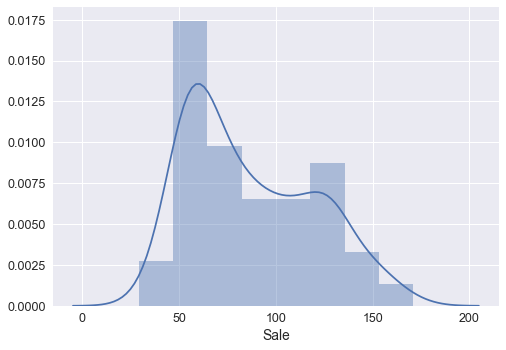

In [90]:
sns.distplot(df_train['Sale'])

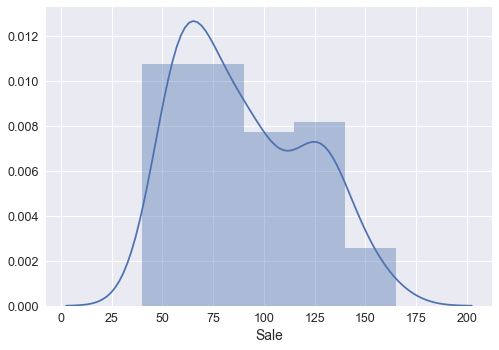

In [88]:
sns.distplot(df_train[df_train['Sold Out'] == 1]['Sale'])

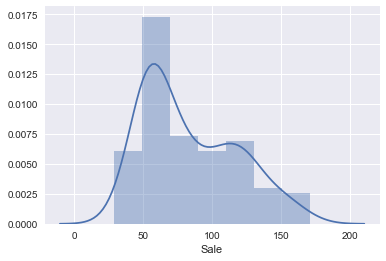

In [63]:
sns.distplot(df_train[df_train['Sold Out'] == 0]['Sale'])

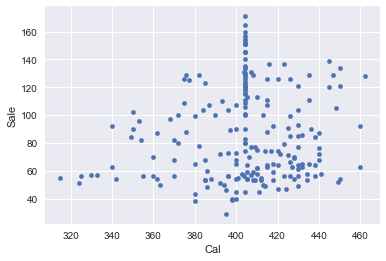

In [65]:
data = pd.concat([df_train['Sale'], df_train['Cal'].fillna(df_train['Cal'].mean())], axis=1)
data.plot.scatter(x='Cal', y='Sale')

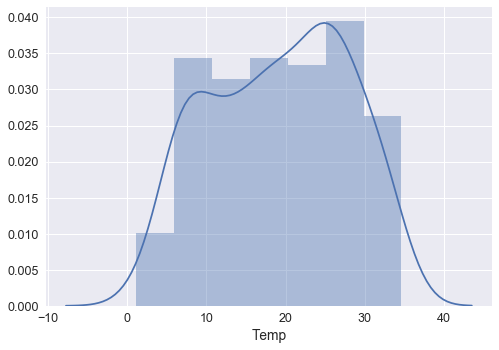

In [93]:
sns.distplot(df_train['Temp'])

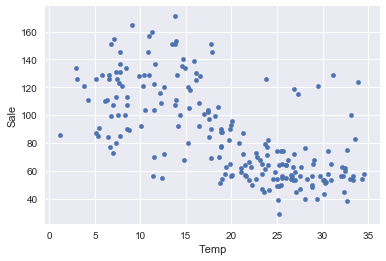

In [67]:
data = pd.concat([df_train['Sale'], df_train['Temp']], axis=1)
data.plot.scatter(x='Temp', y='Sale')

Date         0
Sale         0
Sold Out     0
Cal         41
Sal          0
Weather      0
Prec         0
Temp         0
Mon.         0
Tue.         0
Wed.         0
Thu.         0
Fri.         0
Career       0
Mom          0
dtype: int64

In [80]:
df_train_proc_dn = df_train_proc.copy()
df_train_proc_dn['Cal'].fillna(df_train_proc_dn['Cal'].median(), inplace=True)
df_train_proc_dn.drop('Desc', axis=1, inplace=True)
df_train_proc_dn.drop('Menu', axis=1, inplace=True)
df_train_proc_dn.isnull().sum()

Date        0
Sale        0
Sold Out    0
Cal         0
Sal         0
Weather     0
Prec        0
Temp        0
Mon.        0
Tue.        0
Wed.        0
Thu.        0
Fri.        0
Career      0
Mom         0
dtype: int64

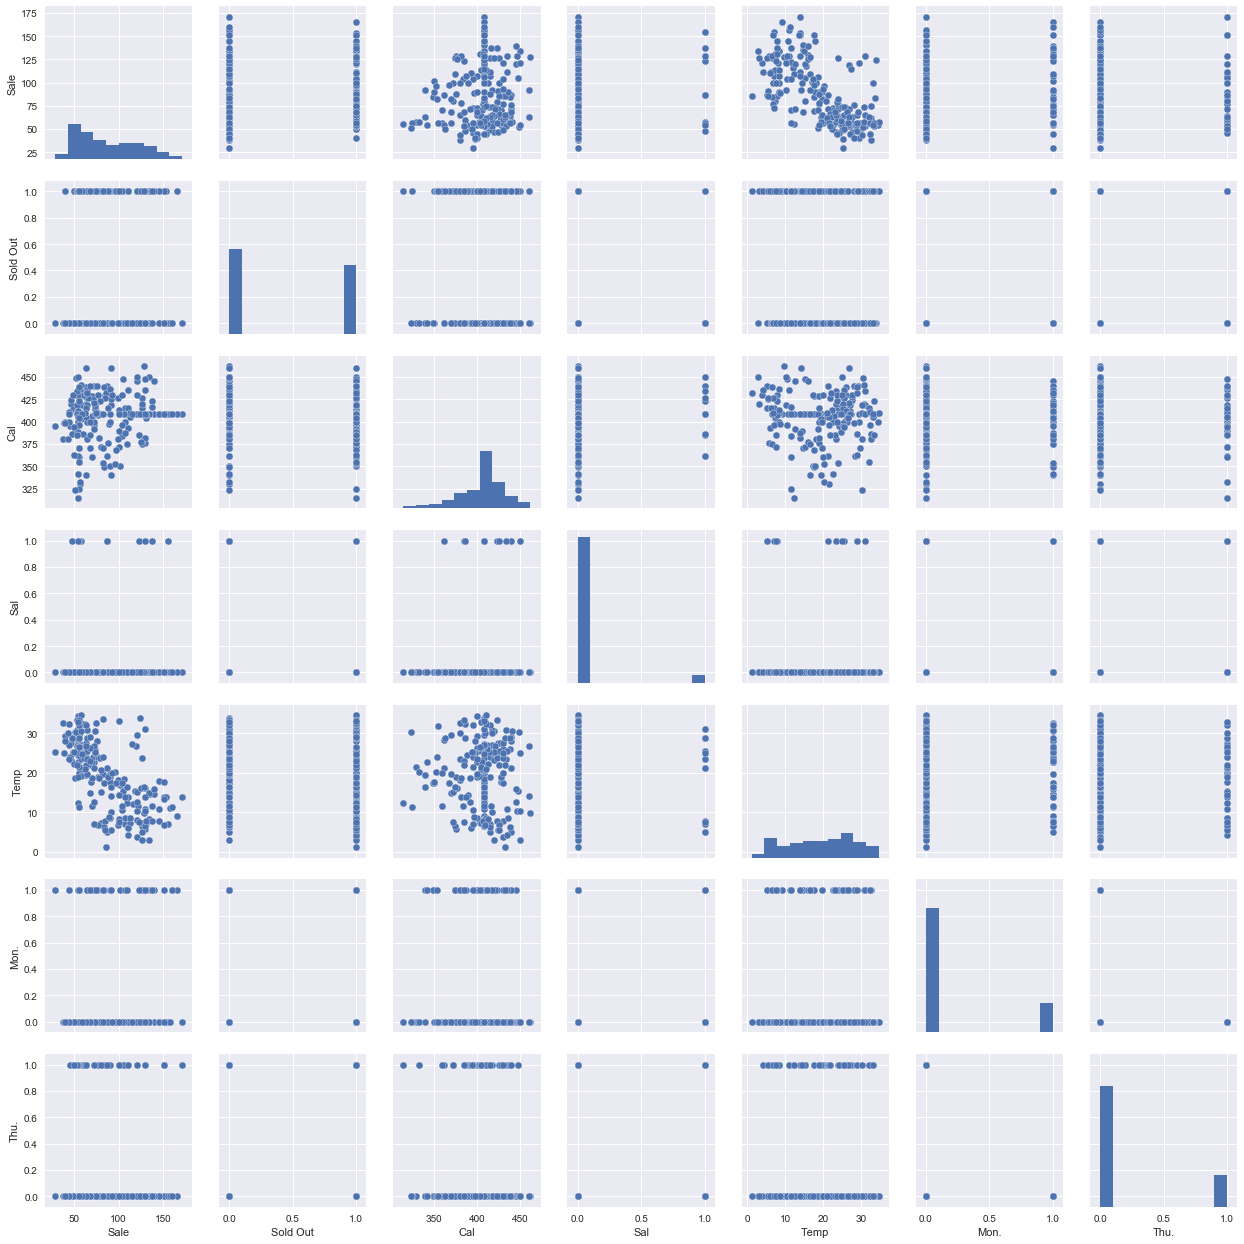

In [81]:
sns.set()
cols = ['Sale', 'Sold Out', 'Cal', 'Sal', 'Temp', 'Mon.', 'Thu.']
sns.pairplot(df_train_proc_dn[cols], size = 2.5)
plt.show();

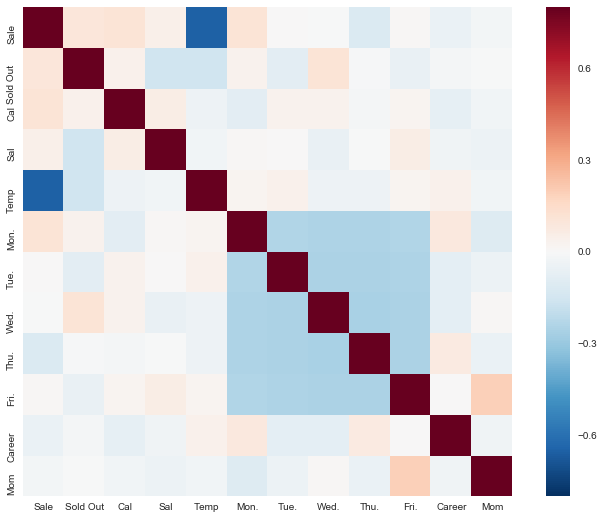

In [79]:
corrmat = df_train_proc_dn.corr()
# corrmat
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

,Date,Sale,Sold Out,Cal,Sal,Weather,Prec,Temp,Mon.,Tue.,Wed.,Thu.,Fri.,Career,Mom
21,2013-12-17,145,0,NaN,0.0,1,0,10.8,0,1,0,0,0,0,1
35,2014-1-17,85,1,430.0,0.0,2,0,7.8,0,0,0,0,1,0,1
59,2014-2-21,113,0,410.0,0.0,2,0,8.5,0,0,0,0,1,0,1
74,2014-3-14,70,1,360.0,0.0,1,0,11.5,0,0,0,0,1,0,1
98,2014-4-18,56,1,325.0,0.0,1,0,11.4,0,0,0,0,1,0,1
115,2014-5-16,126,0,NaN,0.0,2,0,23.8,0,0,0,0,1,0,1
159,2014-7-17,53,1,418.0,0.0,2,0,30.1,0,0,0,1,0,0,1
179,2014-8-20,56,0,423.0,0.0,2,0,33.3,0,0,1,0,0,0,1
198,2014-9-17,49,0,430.0,0.0,1,0,25.0,0,0,1,0,0,0,1


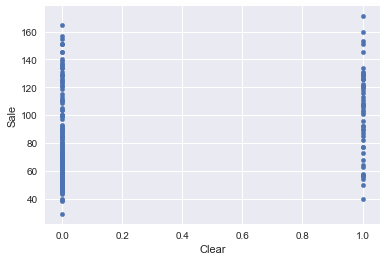

In [11]:
data = pd.concat([df_train_proc['Sale'], df_train_proc['Clear']], axis=1)
data.plot.scatter(x='Clear', y='Sale')

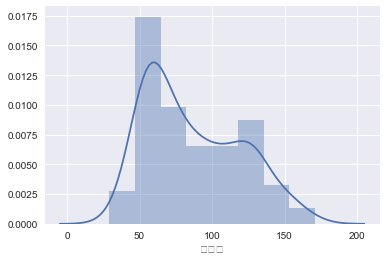

In [9]:
sns.distplot(df_train['販売数'])

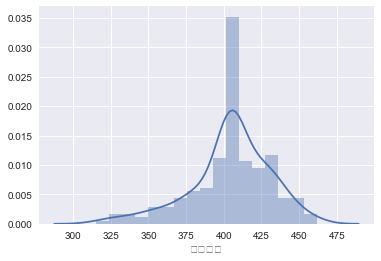

In [14]:
sns.distplot(df_train['カロリー'].fillna(df_train['カロリー'].mean()))

KeyError: 'Week'

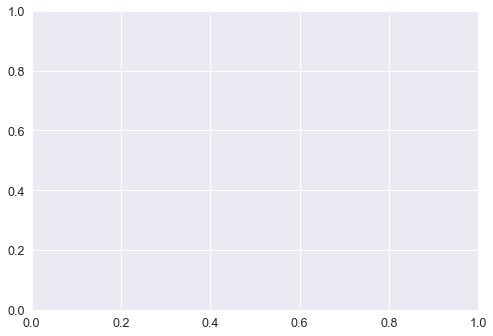

In [102]:
data = pd.concat([df_train['Week'], df_train['Sale']], axis=1)
data.plot.scatter(x='Week', y='Sale')